# Introduction

In an age of globalization and increasing competition, the quest for knowledge has transcended national boundaries, making higher education an arena where excellence is relentlessly pursued. In this pursuit, universities worldwide are vying for recognition and prestige, often relying on their rankings to prove their worth. Poland, with its rich academic heritage and burgeoning aspirations, is no exception. The aim of this work is to embark on a comprehensive exploration of Polish universities, with a specific focus on their performance in various international rankings. Our journey seeks to unravel the complexities of university rankings, assess their methodology, and ultimately determine which of these institutions stands out as the best in the Polish academic landscape.

<br>

# Read data

All the data used in my analysis is sourced from and belongs to https://www.kaggle.com/datasets/mylesoneill/world-university-rankings.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [114]:
cwurData = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/cwurData.csv')
educationExpenditure = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/education_expenditure_supplementary_data.csv')
educationalAttainment = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/educational_attainment_supplementary_data.csv')
schoolCountry = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/school_and_country_table.csv')
shanghaiData = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/shanghaiData.csv')
timesData = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/timesData.csv')

<br>

#### Data display

In [134]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create bookmarks
tab_layout = widgets.Layout(width='90%')
tab = widgets.Tab(layout=tab_layout)
tab.children = [
    widgets.Output() for i in range(6)
]

# Functions that support changing tabs
def on_tab_selected(change):
    selected_tab = change.new
    with tab.children[selected_tab]:
        clear_output()
        if selected_tab == 0:
            display(cwurData.head(10))
        elif selected_tab == 1:
            display(educationExpenditure.head(10))
        elif selected_tab == 2:
            display(educationalAttainment.head(10))
        elif selected_tab == 3:
            display(schoolCountry.head(10))
        elif selected_tab == 4:
            display(shanghaiData.head(10))
        elif selected_tab == 5:
            display(timesData.head(10))

# Assigning a function to change the tab
tab.observe(on_tab_selected, names='selected_index')

# Setting tab labels
tab.set_title(0, 'cwurData')
tab.set_title(1, 'educationExpenditure')
tab.set_title(2, 'educationalAttainment')
tab.set_title(3, 'schoolCountry')
tab.set_title(4, 'shanghaiData')
tab.set_title(5, 'timesData')

display(tab)

**Summary of the data:**\
We have 6 data files in University Rankings dataset, as following:

* cwurData.csv (2200 rows, 14 columns)
* education_expenditure_supplementary_data.csv (333 rows, 9 columns)
* educational_attainment_supplementary_data.csv (79055 rows, 29 columns)
* school_and_country_table.csv (818 rows, 2 columns)
* shanghaiData.csv (4897 rows, 11 columns)
* timesData.csv (2603 rows, 14 columns)

In [116]:
tab_layout = widgets.Layout(width='80%')
tab = widgets.Tab(layout=tab_layout)
tab.children = [
    widgets.Output() for i in range(6)]

def on_tab_selected(change):
    selected_tab = change.new
    with tab.children[selected_tab]:
        clear_output()
        if selected_tab == 0:
            display(cwurData.info())
        elif selected_tab == 1:
            display(educationExpenditure.info())
        elif selected_tab == 2:
            display(educationalAttainment.info())
        elif selected_tab == 3:
            display(schoolCountry.info())
        elif selected_tab == 4:
            display(shanghaiData.info())
        elif selected_tab == 5:
            display(timesData.info())

tab.observe(on_tab_selected, names='selected_index')

tab.set_title(0, 'cwurData')
tab.set_title(1, 'educationExpenditure')
tab.set_title(2, 'educationalAttainment')
tab.set_title(3, 'schoolCountry')
tab.set_title(4, 'shanghaiData')
tab.set_title(5, 'timesData')

display(tab)

<br>

## Polish Universities in World Rankings

In [117]:
cwurPl = cwurData[cwurData['country'] == 'Poland']
cwurPl

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
618,419,University of Warsaw,Poland,1,119,478,145,400,488,363,402.0,637,45.45,2014
678,479,Jagiellonian University,Poland,2,355,478,210,396,466,609,375.0,552,45.19,2014
852,653,AGH University of Science and Technology,Poland,3,257,197,210,722,881,609,909.0,552,44.71,2014
887,688,Warsaw University of Technology,Poland,4,333,478,210,695,748,310,605.0,737,44.66,2014
1077,878,Adam Mickiewicz University in Poznań,Poland,5,233,478,210,665,762,800,897.0,481,44.42,2014
1113,914,University of Wrocław,Poland,6,344,478,210,732,812,800,869.0,737,44.38,2014
1117,918,Nicolaus Copernicus University in Toruń,Poland,7,355,478,210,879,839,493,874.0,552,44.38,2014
1121,922,Wrocław University of Technology,Poland,8,355,443,210,771,900,800,937.0,737,44.37,2014
1153,954,University of Silesia,Poland,9,355,478,210,815,843,609,923.0,737,44.32,2014
1650,451,Jagiellonian University,Poland,1,367,567,218,403,465,645,375.0,355,44.94,2015


Over the years, the ranking has featured a total of 9 different Polish universities. Notably, among these, two universities, Jagiellonian University and University of Warsaw stood out as they consistently occupied positions around 450th place, distinguishing themselves from the rest of the Polish universities. Furthermore, it's worth mentioning that the total scores of all Polish universities remained consistently around 45 points (it's important to note that the scores of the top-performing universities in the world surpass 75 points).

<br>

### Radar Charts Analysis

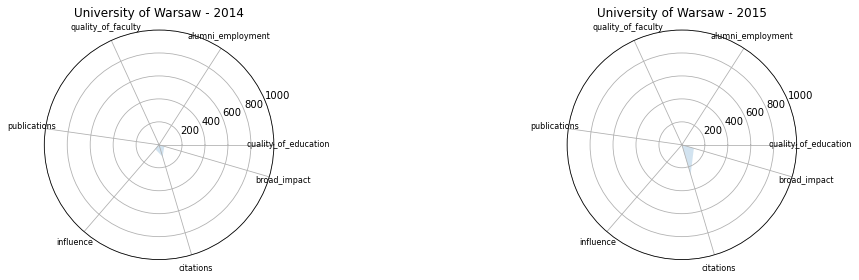

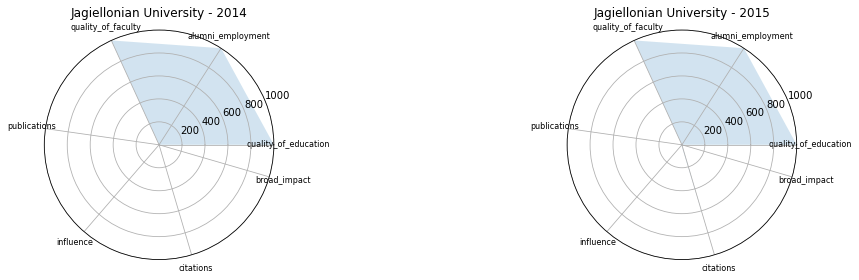

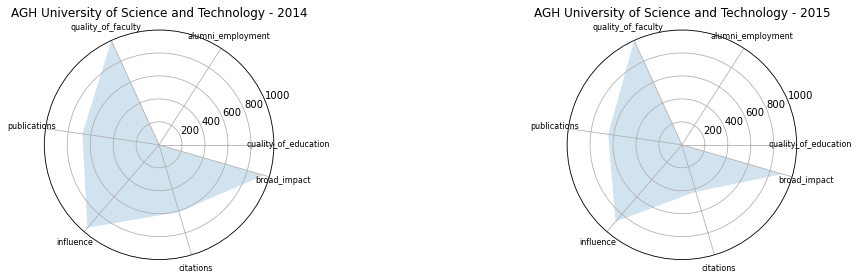

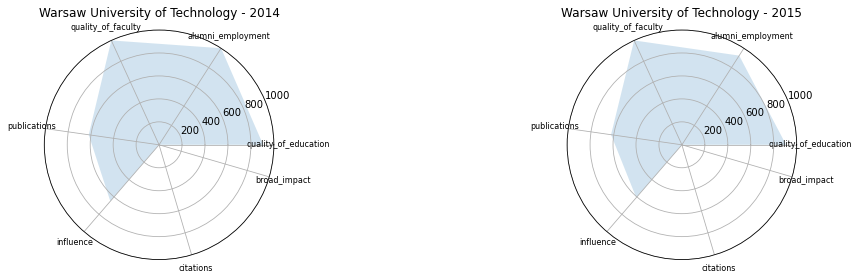

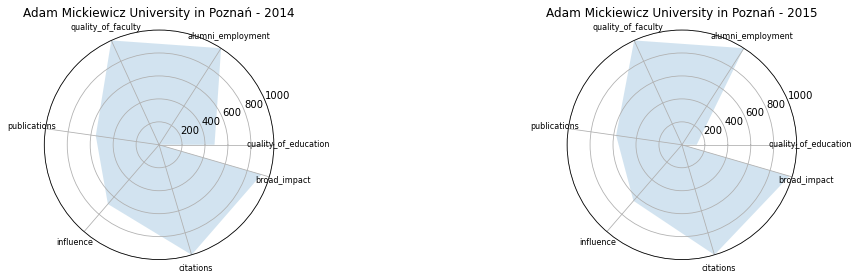

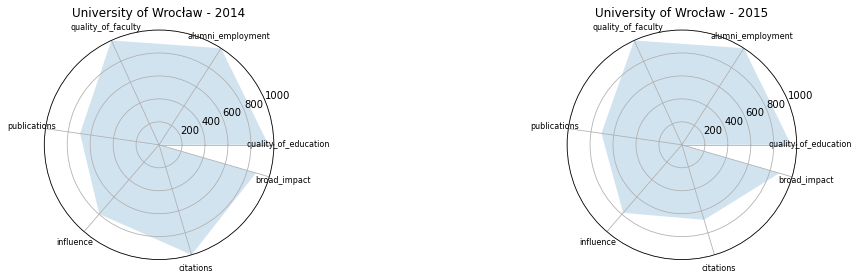

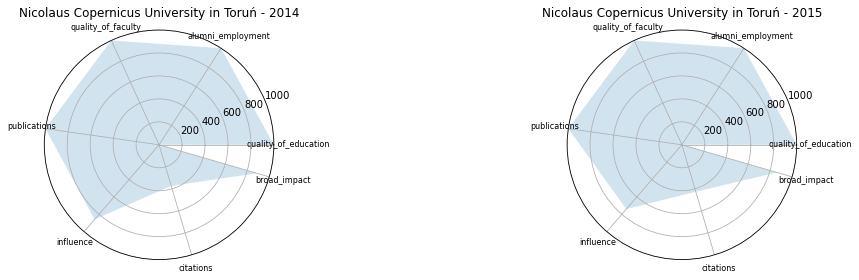

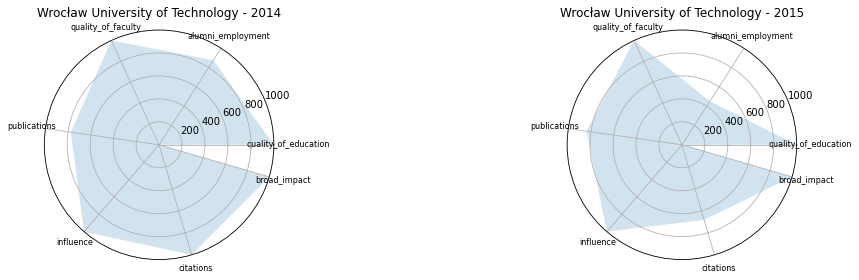

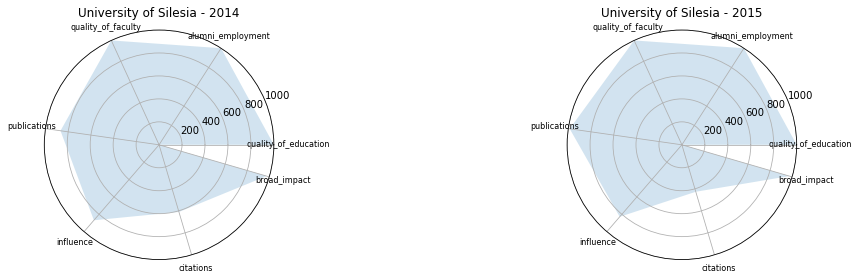

In [118]:
selected_categories = cwurPl.columns[4:11]
data_2014 = cwurPl[cwurPl['year'] == 2014].copy()
data_2015 = cwurPl[cwurPl['year'] == 2015].copy()

data_2014[selected_categories] = (data_2014[selected_categories] - data_2014[selected_categories].min()) / (data_2014[selected_categories].max() - data_2014[selected_categories].min()) * (1000 - 0) + 0
data_2015[selected_categories] = (data_2015[selected_categories] - data_2015[selected_categories].min()) / (data_2015[selected_categories].max() - data_2015[selected_categories].min()) * (1000 - 0) + 0

for institution in cwurPl['institution'].unique():
    data_2014_institution = data_2014[data_2014['institution'] == institution][selected_categories].values.flatten()
    data_2015_institution = data_2015[data_2015['institution'] == institution][selected_categories].values.flatten()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    ax1 = plt.subplot(1, 2, 1, polar=True)
    ax2 = plt.subplot(1, 2, 2, polar=True)

    ax1.fill_between(range(len(selected_categories)), data_2014_institution, alpha=0.2)
    ax2.fill_between(range(len(selected_categories)), data_2015_institution, alpha=0.2)

    ax1.set_xticks(range(len(selected_categories)))
    ax1.set_xticklabels(selected_categories, fontsize=8, rotation='vertical')
    ax1.set_title(f'{institution} - 2014')
    ax1.set_ylim(0, 1000)

    ax2.set_xticks(range(len(selected_categories)))
    ax2.set_xticklabels(selected_categories, fontsize=8, rotation='vertical')
    ax2.set_title(f'{institution} - 2015')
    ax2.set_ylim(0, 1000)

    plt.tight_layout()
    plt.show()

One of the tools at our disposal to assess the universities' strengths and weaknesses are radar charts. These charts provide a visual representation of key performance indicators for each university, allowing us to track changes over time.\
As we delved into the radar charts for the universities, one institution consistently stood out as the leader. Among all the universities analyzed, it became evident that University of Warsaw excelled in both 2014 and 2015. Notably, University of Warsaw exhibited the smallest enclosed area on its radar charts for both years, which, in this context, signifies superior performance. This clear and consistent pattern in the radar charts underscores the remarkable achievements of University of Warsaw in comparison to its peers.\
Furthermore, Jagiellonian University also demonstrated a commendable performance, with a smaller enclosed area than most other universities, although not quite as remarkable as University of Warsaw.

<br>

In [119]:
cwurPl_sorted = cwurPl.sort_values(by=["institution", "year"])

# Calculation of changes in ranking for each university
cwurPl_sorted["ranking_change"] = cwurPl_sorted.groupby("institution")["world_rank"].diff().fillna(0)

cwurPl_sorted = cwurPl_sorted[cwurPl_sorted["ranking_change"] != 0]
cwurPl_sorted["ranking_change"] = -cwurPl_sorted["ranking_change"]
cwurPl_sorted = cwurPl_sorted.iloc[:, [1, -1]]
cwurPl_sorted = cwurPl_sorted.sort_values(by="ranking_change", ascending=False)
cwurPl_sorted

,institution,ranking_change
1845,Warsaw University of Technology,42.0
1650,Jagiellonian University,28.0
2110,Nicolaus Copernicus University in Toruń,7.0
2120,University of Wrocław,-7.0
2163,University of Silesia,-10.0
2089,Adam Mickiewicz University in Poznań,-12.0
2143,Wrocław University of Technology,-22.0
1661,University of Warsaw,-43.0
1981,AGH University of Science and Technology,-129.0


It is worth highlighting that the majority of universities experienced a decline in their rankings from 2014 to 2015. In this period, only three universities managed to achieve an improvement in their positions. Among these institutions, the Warsaw University of Technology stands out remarkably, as it made an impressive leap in the rankings, advancing by an astonishing 42 places.\
During the same period, AGH University of Science and Technology	 saw a substantial decline, plummeting by a staggering 129 positions. This dramatic drop in rank is indeed noteworthy and underscores the challenges that universities may face in maintaining or improving their global standing.

<br>

## Polish Universities in Shanghai Academic Rankings

**The Shanghai Academic Rankings for World Universities (ARWU)** is based on six indicators, such as the number of Nobel Prize and Fields Medal laureates, the number of researchers among university staff, the number of articles published in high-impact scientific journals, and others.

In [120]:
shanghaiData = pd.merge(shanghaiData, schoolCountry, left_on="university_name", right_on="school_name")
shanghaiData = shanghaiData.drop('school_name', axis=1)

We need to solve an issue with a lot of rows with the Total Score missing (NA), 78 % of rows contain NA.
We can calculate the total_score. The formula is: \
<code>total_score = 0.1 * alumni + 0.2 * award + 0.2 * hici + 0.2 * ns + 0.2 * pub + 0.1 * pcp

In [121]:
shanghaiData['t_score'] = 0.1 * shanghaiData['alumni'] + 0.2 * shanghaiData['award'] + \
                              0.2 * shanghaiData['hici'] + 0.2 * shanghaiData['ns'] + \
                              0.2 * shanghaiData['pub'] + 0.1 * shanghaiData['pcp']

shanghaiData['total_score'].fillna(shanghaiData['t_score'], inplace=True)

<br>

The Shanghai World Rankings for universities have a World Rank (smaller value is the best), a National Rank (per country, smaller value is best) and scores from 0 to 100 for:

* Total Score
* Alumni of an institution winning Nobel Prizes and Fields Medals (alumni)
* Staff of an institution winning Nobel Prizes and Fields Medals (awards)
* Highly Citated researchers (hici)
* Number of papers in Nature & Science papers (ns)
* Papers indexed in Science Citation Index-expanded and Social Science Citation Index (pub)
* Per capita academic performance of an institution (pcp)

In [122]:
shanghaiPl = shanghaiData[shanghaiData['country'] == 'Poland']
shanghaiPl

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,country,t_score
1975,301-400,Jagiellonian University,1-2,10.21,0.0,0.0,7.9,4.3,31.8,14.1,2005,Poland,10.21
1976,301-400,Jagiellonian University,1-2,11.86,13.5,0.0,7.7,4.5,32.4,15.9,2006,Poland,11.86
1977,305-402,Jagiellonian University,1,11.20,13.2,0.0,7.4,2.9,31.5,15.2,2007,Poland,11.20
1978,303-401,Jagiellonian University,1-2,11.53,12.5,0.0,7.3,4.7,31.6,15.6,2008,Poland,11.53
1979,303-401,Jagiellonian University,1-2,11.52,12.2,0.0,7.3,4.8,31.6,15.6,2009,Poland,11.52
1980,301-400,Jagiellonian University,1-2,11.58,11.9,0.0,7.2,5.5,31.8,14.9,2010,Poland,11.58
1981,301-400,Jagiellonian University,1-2,11.95,11.8,0.0,7.2,7.5,31.3,15.7,2011,Poland,11.95
1982,301-400,Jagiellonian University,1-2,11.59,10.5,0.0,3.6,6.8,34.0,16.6,2014,Poland,11.59
1983,301-400,Jagiellonian University,1-2,11.36,10.3,0.0,3.6,5.9,33.6,17.1,2015,Poland,11.36
2324,301-400,University of Warsaw,1-2,12.03,17.7,0.0,0.0,8.1,35.1,16.2,2005,Poland,12.03


In the Shanghai Academic Ranking over the years, only two Polish universities, Jagiellonian University and University of Warsaw have made their presence felt.

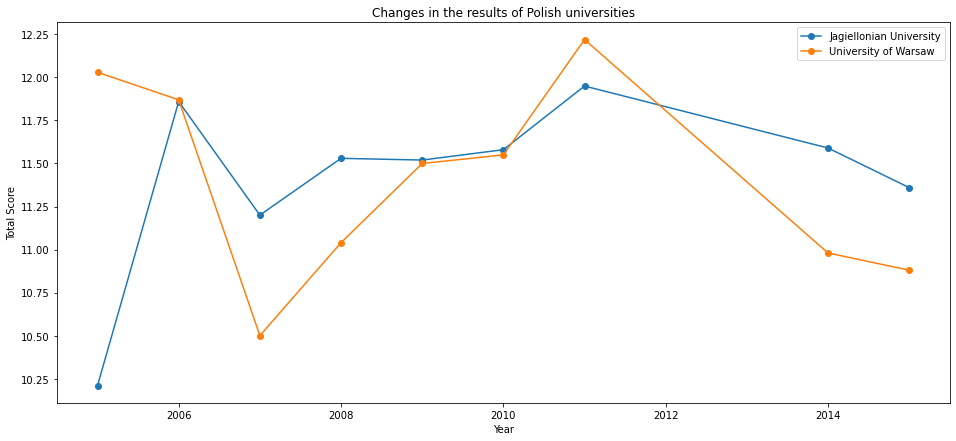

In [123]:
grouped_shanghaiPl = shanghaiPl.groupby('university_name')

plt.figure(figsize=(16, 7))

for name, group in grouped_shanghaiPl:
    plt.plot(group['year'], group['total_score'], label=name, marker='o')

plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.title('Changes in the results of Polish universities')
plt.xlabel('Year')
plt.ylabel('Total Score')
plt.show()

Upon examining the line graph representation of University of Warsaw and Jagiellonian University performance in Shanghai University Ranking it can be stated that over the years, University of Warsaw outperformed Jagiellonian University in terms of total score in only two years, namely 2005 and 2012.

<br>

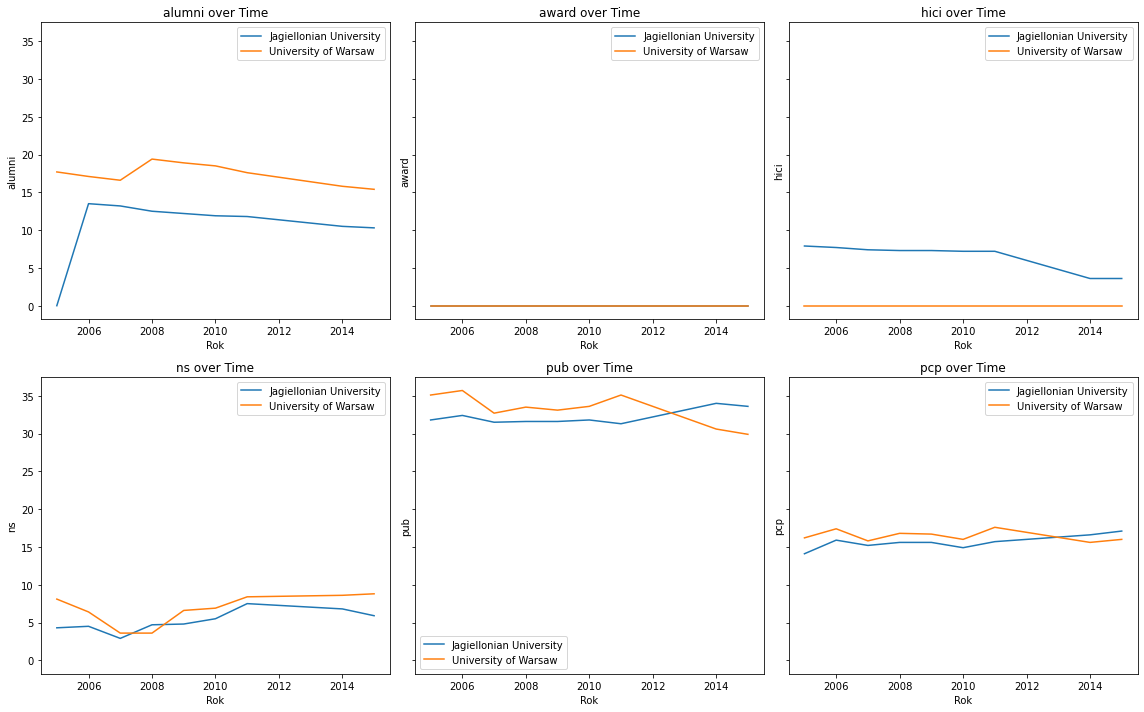

In [124]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharey=True)

for i, column_idx in enumerate(range(4, 10)):
    row = i // 3
    col = i % 3
    column_name = shanghaiPl.columns[column_idx]

    for name, group in grouped_shanghaiPl:
        axes[row, col].plot(group['year'], group.iloc[:, column_idx], label=name)

    axes[row, col].legend(loc='best')
    axes[row, col].set_title(f'{column_name} over Time')
    axes[row, col].set_xlabel('Rok')
    axes[row, col].set_ylabel(column_name)

plt.tight_layout()
plt.show()

In most categories, Jagiellonian University has lower values (smaller value is best) over the years. Since 2013, in 'papers indexed in Science Citation Index-expanded and Social Science Citation Index' (pub) category, University of Warsaw has achieved better results than Jagiellonian University. Additionally since 2013, in 'per capita academic performance of an institution' (pcp), University of Warsaw has also achieved better results than Jagiellonian University.

<br>

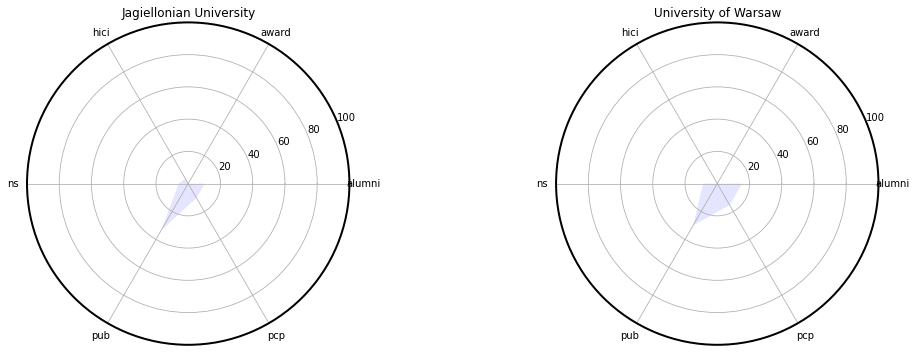

In [125]:
shanghaiPl_2015 = shanghaiPl[shanghaiPl['year'] == 2015]
categories = shanghaiPl_2015.iloc[:, 4:10].columns

# Set a starting angle and equal spacing between categories
angle = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)

fig = plt.figure(figsize=(16, 5))

for i in range(len(shanghaiPl_2015['university_name'])):
    ax = fig.add_subplot(1, len(shanghaiPl_2015['university_name']), i+1, polar=True)
    v = shanghaiPl_2015.iloc[:, 4:10].iloc[i, :].values[:-1]
    v = np.concatenate((v, [v[0]]))
    ax.fill(angle, v, 'b', alpha=0.1)
    ax.set_xticks(angle)
    ax.set_xticklabels(categories)
    ax.set_title(shanghaiPl_2015['university_name'].iloc[i])
    ax.set_ylim(0, 100)
    ax.spines['polar'].set_linewidth(2)

plt.tight_layout()
plt.show()

Let's focus our attention on the radar charts for Jagiellonian University and University of Warsaw in the year 2015. When we scrutinize the radar charts for both universities in 2015, a noteworthy pattern emerges. In both cases, the enclosed area, which represents the overall performance across key indicators, is not the largest. It is evident that Polish universities face challenges when compared to the world's top institutions. This can be further exemplified by the fact that only two Polish universities are included in the ranking. 

<br>

## Polish Universities in Times Higher Education (THE) University Rankings

**The Times Higher Education (THE) University Rankings** is an annual ranking of the world's top universities prepared by the British magazine "Times Higher Education." It has been published since 2010 and is widely recognized as a prestigious ranking in the field of higher education.\
The Times Higher Education data has information from 2011 to 2016. There is a World Rank (smaller values are better) and coeficients (between 0 and 100) for:

* Teaching (teaching/the learning environment)
* International Outlook (international/staff, students and research)
* Research (research/volume, income and reputation)
* Citations (citations/research influence)
* Industry Income (income/knowledge transfer, value not available for all)
* Overall (total_score)

The weight of the above factors in calculating the total score are as following:
* Teaching: 25%
* International Outlook 7.5%
* Research: 30%
* Citations: 30%
* Industry Income: 7.5%

<br>

#### Cleaning data

In [126]:
# Change data types
timesData['international'] = pd.to_numeric(timesData['international'], errors='coerce')
timesData['income'] = pd.to_numeric(timesData['income'], errors='coerce')
timesData['international_students'] = timesData['international_students'].str.rstrip('%').astype(float)
timesData['num_students'] = timesData['num_students'].str.replace(',', '').astype(float)
timesData.rename(columns={'international_students': 'international_students[%]'}, inplace=True)

In [127]:
# Calculate total score
timesData['t_score'] = (
    0.3 * timesData['teaching'] +
    0.075 * timesData['international'] +
    0.3 * timesData['research'] +
    0.3 * timesData['citations'] +
    0.025 * timesData['income'])

timesData['total_score'] = timesData['total_score'].replace('-', np.nan)
timesData['total_score'] = timesData.apply(lambda row: row['t_score'] if pd.isna(row['total_score']) else row['total_score'], axis=1)
timesData['total_score'] = timesData['total_score'].astype(float).round(1)
timesData.drop(columns=['t_score'], inplace=True)

In [128]:
timesData['female_male_ratio'] = timesData['female_male_ratio'].replace('-', np.nan)
timesData[['female_ratio', 'male_ratio']] = timesData['female_male_ratio'].str.split(' : ', expand=True)

In [129]:
timesPl = timesData[timesData['country'] == 'Poland']
timesPl

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students[%],female_male_ratio,year,female_ratio,male_ratio
511,301-350,Jagiellonian University,Poland,25.1,39.5,16.0,43.1,25.8,28.9,42835.0,11.5,5.0,67 : 33,2012,67,33
546,301-350,University of Warsaw,Poland,21.6,35.8,15.7,44.3,NaN,NaN,49292.0,14.1,7.0,67 : 33,2012,67,33
960,351-400,Jagiellonian University,Poland,22.7,41.7,13.8,48.2,29.5,29.3,42835.0,11.5,5.0,67 : 33,2013,67,33
999,351-400,University of Warsaw,Poland,23.2,39.8,18.4,54.0,27.9,32.4,49292.0,14.1,7.0,67 : 33,2013,67,33
1350,301-350,University of Warsaw,Poland,18.7,42.8,14.3,71.1,28.3,35.1,49292.0,14.1,7.0,67 : 33,2014,67,33
1750,301-350,University of Warsaw,Poland,20.8,41.6,13.6,70.0,28.5,35.2,49292.0,14.1,7.0,67 : 33,2015,67,33
2399,501-600,University of Warsaw,Poland,26.1,41.6,15.8,42.2,28.5,29.1,49292.0,14.1,7.0,67 : 33,2016,67,33
2404,601-800,Adam Mickiewicz University,Poland,20.0,25.7,11.0,15.3,28.7,16.5,40633.0,15.6,1.0,71 : 29,2016,71,29
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,NaN,NaN,35569.0,17.0,1.0,NaN,2016,NaN,NaN
2473,601-800,Gdańsk University of Technology,Poland,15.5,16.1,9.5,15.2,36.8,14.2,25217.0,23.3,1.0,39 : 61,2016,39,61


<br>

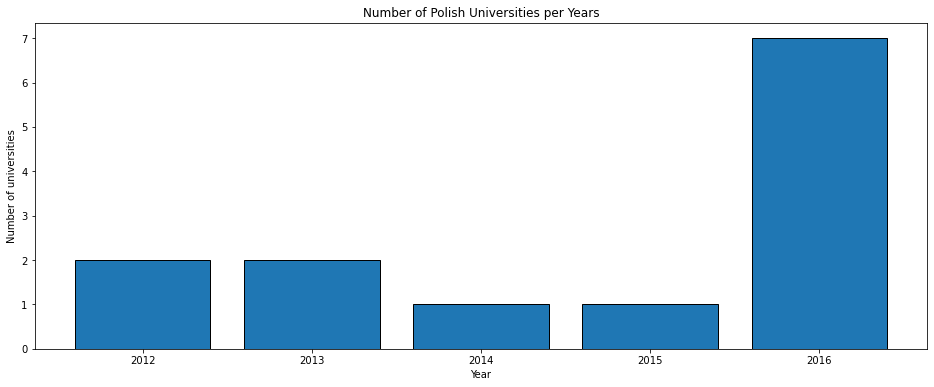

In [130]:
universities_per_year = timesPl.groupby('year')['university_name'].nunique().reset_index()

plt.figure(figsize=(16, 6))
plt.bar(universities_per_year['year'], universities_per_year['university_name'], edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of universities')
plt.title('Number of Polish Universities per Years')
plt.xticks(universities_per_year['year'])
plt.show()

Over the years from 2012 to 2016, University of Warsaw consistently maintained its presence in the ranking. In the years 2012 to 2013, there were two Polish universities in the ranking, while from 2014 to 2015, only one Polish university was represented. However in 2016, the number of Polish universities listed in the ranking increased significantly to seven.

<br>

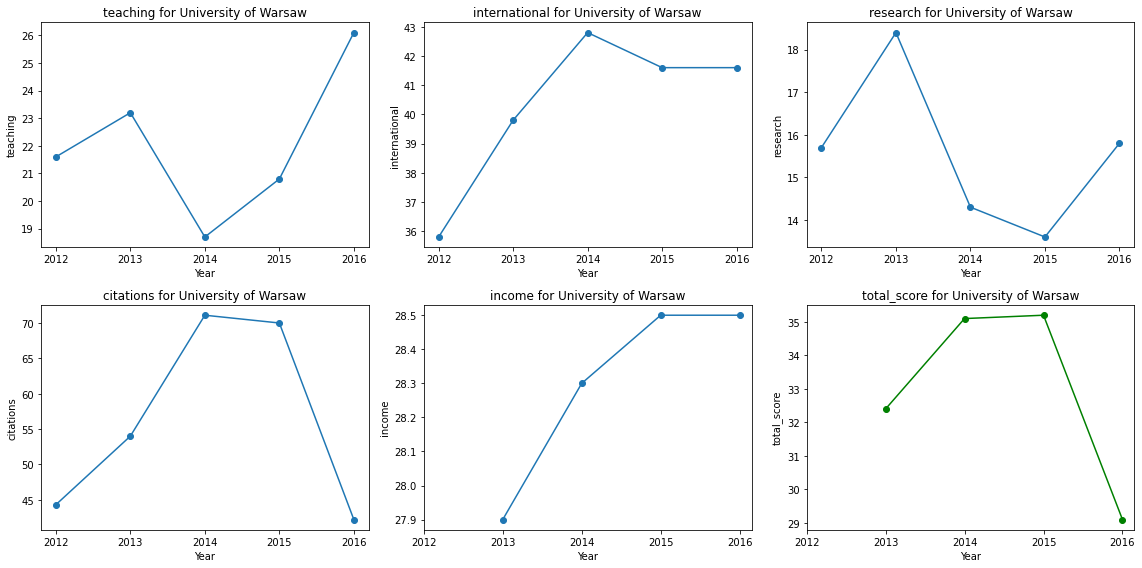

In [131]:
warsaw_data = timesPl[timesPl['university_name'] == 'University of Warsaw']

plt.figure(figsize=(16, 8))

for i, column in enumerate(warsaw_data.columns[3:9]):
    plt.subplot(2, 3, i + 1)
    if column == 'total_score':
        plt.plot(warsaw_data['year'], warsaw_data[column], marker='o', linestyle='-', color='green', label=f'{column} (wyróżniony)')
    else:
        plt.plot(warsaw_data['year'], warsaw_data[column], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'{column} for University of Warsaw')
    plt.xticks(range(min(warsaw_data['year']), max(warsaw_data['year']) + 1, 1))

plt.tight_layout()
plt.show()

Certainly, I have presented the changes in categories included in the ranking for the University of Warsaw over the years using a line graph. This particular university is of significant interest as it is the only one that consistently appeared in the rankings from 2012 to 2016.\
The most significant observation that stands out is the category of "Citations" for the University of Warsaw. Between 2015 and 2016, there was a noteworthy decline in the value of this category, with a roughly 25% decrease. This decline in the "Citations" category had a profound impact on the overall "Total Score" resulting in a substantial decrease of approximately 6%.\
It's worth noting that in the remaining categories, there was a prevailing upward trend for the University of Warsaw. However, there was an exception in the "Research" category where the trend was not as positive.

<br>

In [138]:
timesPl.groupby('year')[timesPl.columns[3:9]].agg(['mean', 'std', 'median']).reset_index()

year   teaching                  international                    research  \
              mean       std median          mean       std median       mean   
0  2012  23.350000  2.474874  23.35     37.650000  2.616295  37.65  15.850000   
1  2013  22.950000  0.353553  22.95     40.750000  1.343503  40.75  16.100000   
2  2014  18.700000       NaN  18.70     42.800000       NaN  42.80  14.300000   
3  2015  20.800000       NaN  20.80     41.600000       NaN  41.60  13.600000   
4  2016  19.557143  4.308463  19.40     24.857143  9.473798  20.70  10.128571   

                    citations                       income                   \
        std median       mean        std median       mean       std median   
0  0.212132  15.85  43.700000   0.848528   43.7  25.800000       NaN   25.8   
1  3.252691  16.10  51.100000   4.101219   51.1  28.700000  1.131371   28.7   
2       NaN  14.30  71.100000        NaN   71.1  28.300000       NaN   28.3   
3       NaN  13.60  70.000000        NaN   70.0  28.500000       NaN   28.5   
4  4.083999   9.50  28.542857  11.549438   30.7  32.916667  7.867761   28.6   

  total_score                   
         mean       std median  
0   28.900000       NaN  28.90  
1   30.850000  2.192031  30.85  
2   35.100000       NaN  35.10  
3   35.200000       NaN  35.20  
4   20.466667  5.825004  19.85

It's worth noting that in many categories for the year 2016, significant differences can be observed compared to previous years. These differences primarily stem from the fact that in 2016, the ranking incorporated a larger number of Polish universities, which had lower scores than those universities that had been part of the ranking for a longer period. The inclusion of universities with lower scores had an impact on the aggregated data.\
Additionally, it's important to mention that the sample size for the years 2012 to 2015 was relatively small, which may lead to some instability in the results for those specific years. A small sample size can result in greater variability and may make the results for those years less representative compared to later periods.

<br>

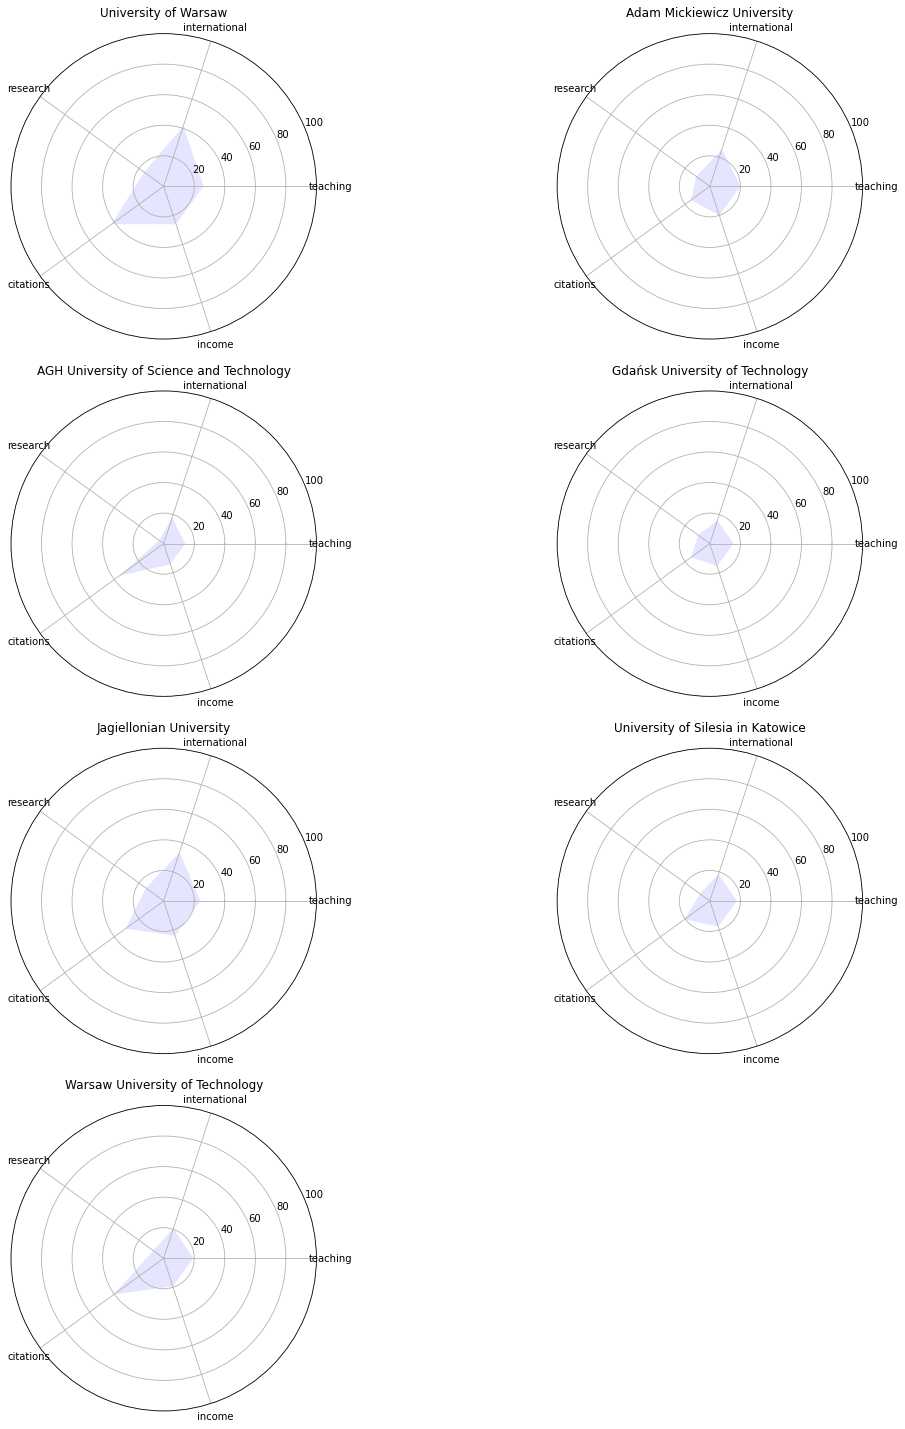

In [132]:
timesPl_2016 = timesPl[timesPl['year'] == 2016]
categories1 = timesPl_2016.iloc[:, 3:8].columns

# Set a starting angle and equal spacing between categories
angle1 = np.linspace(0, 2 * np.pi, len(categories1), endpoint=False)

# Calculate the number of rows and columns for subplots
num_rows = len(timesPl_2016['university_name']) // 2 + len(timesPl_2016['university_name']) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows), subplot_kw={'polar': True})
axes = axes.ravel()

for i, ax in enumerate(axes):
    if i < len(timesPl_2016['university_name']):
        v = timesPl_2016.iloc[:, 3:8].iloc[i, :].values[:-1]
        v = np.concatenate((v, [v[0]]))
        ax.fill(angle1, v, 'b', alpha=0.1)
        ax.set_xticks(angle1)
        ax.set_xticklabels(categories1)
        ax.set_title(timesPl_2016['university_name'].iloc[i])
        ax.set_ylim(0, 100)

# Remove any extra empty subplots
for i in range(len(timesPl_2016['university_name']), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Based on the radar charts for the year 2016, it is evident that among the universities included in the ranking, the University of Warsaw and the Jagiellonian University boast the most substantial enclosed areas. These radar charts provide a visual representation of the universities' performance across various criteria, and the larger enclosed areas indicate a broader range of strengths. The University of Warsaw and the Jagiellonian University's impressive performance in the radar charts underscores their prominent positions within the Polish academic landscape but still significantly lagging behind the world's best universities.

<br>

### Additional metrics for Polish Universities

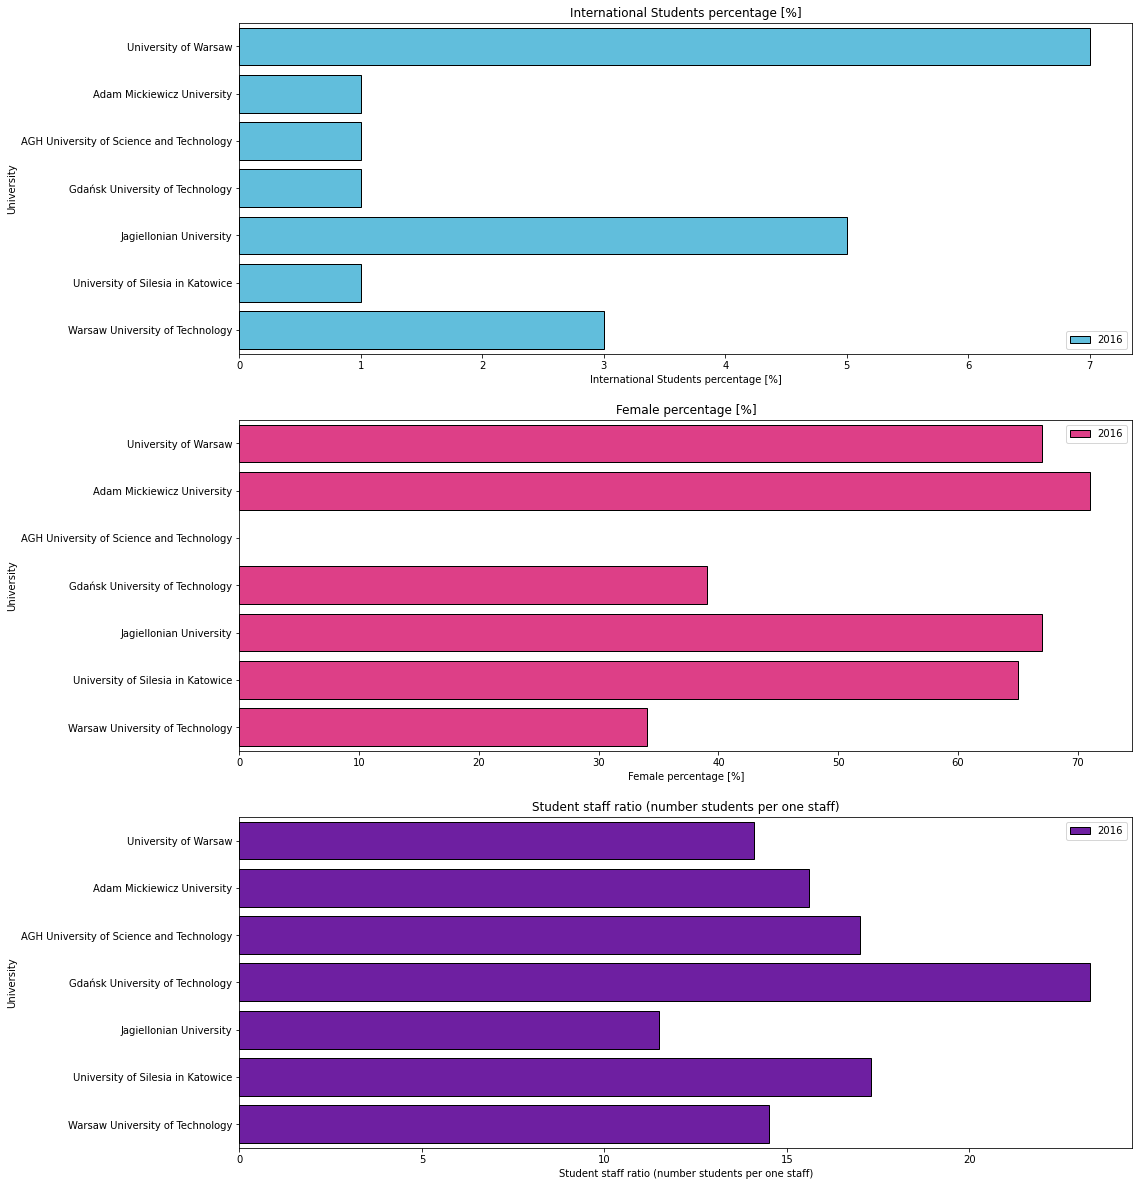

In [133]:
plt.figure(figsize=(16, 28))
plt.subplot(4, 1, 1)
sns.barplot(data=timesPl_2016, y='university_name', x=timesPl_2016['international_students[%]'], hue='year', palette=["#4CC9F0"], edgecolor='black')
plt.ylabel('University')
plt.xlabel('International Students percentage [%]')
plt.title('International Students percentage [%]')
plt.legend(title=None)

plt.subplot(4, 1, 2)
sns.barplot(data=timesPl_2016, y='university_name', x=timesPl_2016['female_ratio'].astype(float), hue='year', palette=["#F72585"], edgecolor='black')
plt.ylabel('University')
plt.xlabel('Female percentage [%]')
plt.title('Female percentage [%]')
plt.legend(title=None)

plt.subplot(4, 1, 3)
sns.barplot(data=timesPl_2016, y='university_name', x=timesPl_2016['student_staff_ratio'].astype(float), hue='year', palette=["#7209B7"], edgecolor='black')
plt.ylabel('University')
plt.xlabel('Student staff ratio (number students per one staff)')
plt.title('Student staff ratio (number students per one staff)')
plt.legend(title=None)

Indeed, it is noteworthy that the University of Warsaw and the Jagiellonian University, being among the top-ranking Polish institutions, have the highest percentage of international students among Polish universities. This phenomenon can be primarily attributed to the fact that the University of Warsaw and the Jagiellonian University are among the best-ranked institutions in Poland, and as a result, international students are drawn to study there.